<a href="https://colab.research.google.com/github/xyaoaf/UrbanTreeStudywithLidar/blob/main/230305TreeTrainingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
dfSE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/StreetTreeE009701Training.csv')
dfSW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/StreetTreeW002401Training.csv')
dfPE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/ParkTreeE009701Training.csv')
dfPW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/ParkTreeW002401Training.csv')
popu = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeMetrics_Clean.csv')

In [3]:
dfSE

,OID_,Join_Count,TARGET_FID,JOIN_FID,OBJECTID,Date_Inven,Species,DBH,Condition,Site_Type,Site_Width,Wires,Site_devel,Site_Size,Notes,Address,Neighborho,Collected_,Planted_By,Plant_Date,Scientific,Family,Genus,Common,Functional,Size,Edible,Species_De,keep,height,winRadius,treeID,crownArea,Ground,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean
0,0,1,0,1288,151135,10/14/2015 0:00:00,LAIN,1.20,Fair,strip,3.00,No HV,Improved,Small,,736 SE 153RD AVE,CENTENNIAL,staff,,NaN,Lagerstroemia indica,Lythraceae,Lagerstroemia,crape myrtle,BD,S,no,,1,7.81,1.89,1294,5.95,0.00,26.96,0.10,9598.91,750.94,1.59
1,1,1,1,2448,151136,10/14/2015 0:00:00,PC,21.00,Good,CNS,0.00,No HV,Unimproved,Large,<Null>,15716 SE MILLMAIN DR,CENTENNIAL,staff,,NaN,Picea spp.,Pinaceae,Picea,spruce,CE,L,no,,1,51.04,4.05,2454,53.98,0.00,706.60,0.09,10000.00,2158.56,7.64
2,2,1,2,1131,151137,10/14/2015 0:00:00,PO,5.00,Poor,strip,3.00,No HV,Improved,Small,Estimated,724 SE 153RD AVE,CENTENNIAL,staff,,NaN,Populus spp.,Salicaceae,Populus,poplar,BD,L,no,,1,28.58,2.93,1137,38.09,0.00,318.09,0.06,5555.52,1391.82,5.36
3,3,0,3,-1,151138,10/14/2015 0:00:00,UL,1.90,Good,CNS,0.00,No HV,Unimproved,Large,<Null>,15700 SE MILLMAIN DR,CENTENNIAL,staff,,NaN,Ulmus spp.,Ulmaceae,Ulmuys,elm,BD,L,no,,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,0,4,-1,151139,10/14/2015 0:00:00,PAPE,2.80,Fair,strip,3.00,No HV,Improved,Small,<Null>,712 SE 153RD AVE,CENTENNIAL,staff,,NaN,Parrotia persica,Hamamelidaceae,Parrotia,Persian ironwood,BD,M,no,,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,918,0,918,-1,154252,10/20/2015 0:00:00,QU,1.60,Fair,CNS,0.00,No HV,Unimproved,Large,<Null>,1311 SE 152ND PL,CENTENNIAL,staff,,NaN,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,L,no,,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
919,919,1,919,2626,154253,10/20/2015 0:00:00,QU,1.50,Fair,CNS,0.00,No HV,Unimproved,Large,<Null>,1311 SE 152ND PL,CENTENNIAL,staff,,NaN,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,L,no,,1,9.40,1.97,2632,7.53,0.00,33.53,0.12,10000.00,643.49,2.10
920,920,1,920,2457,154254,10/20/2015 0:00:00,AC,1.30,Fair,CNS,0.00,No HV,Unimproved,Large,<Null>,15106 SE MAIN ST,CENTENNIAL,staff,,NaN,Acer spp.,Sapindaceae,Acer,"maple, other",BD,M,no,,1,9.15,1.96,2463,14.12,0.00,58.34,0.06,8788.99,665.39,1.90
921,921,0,921,-1,154258,10/20/2015 0:00:00,CA,1.10,Fair,CNS,0.00,No HV,Unimproved,Large,<Null>,1416 SE 151ST AVE,CENTENNIAL,volunteer,,NaN,Carpinus spp.,Betulaceae,Carpinus,hornbeam,BD,M,no,,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
dfSE = dfSE.loc[:, ['OBJECTID','DBH','Condition','Scientific','Family','Genus','Common','Functional','keep','treeID']]
dfSE

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,keep,treeID
0,151135,1.20,Fair,Lagerstroemia indica,Lythraceae,Lagerstroemia,crape myrtle,BD,1,1294
1,151136,21.00,Good,Picea spp.,Pinaceae,Picea,spruce,CE,1,2454
2,151137,5.00,Poor,Populus spp.,Salicaceae,Populus,poplar,BD,1,1137
3,151138,1.90,Good,Ulmus spp.,Ulmaceae,Ulmuys,elm,BD,0,0
4,151139,2.80,Fair,Parrotia persica,Hamamelidaceae,Parrotia,Persian ironwood,BD,0,0
...,...,...,...,...,...,...,...,...,...,...
918,154252,1.60,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,0,0
919,154253,1.50,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,2632
920,154254,1.30,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,2463
921,154258,1.10,Fair,Carpinus spp.,Betulaceae,Carpinus,hornbeam,BD,0,0


In [5]:
dfSE = dfSE.sort_values(by=['keep', 'treeID'], ascending=[False, True])
dfSE.loc[133, 'treeID'] = 2446
dfSE.rename(columns={'keep': 'Keep'}, inplace=True)
dfSE['treeID'] = dfSE['treeID'] + 20000
dfSE

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
133,152520,1.40,Good,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,22446
248,152677,3.50,Poor,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20009
204,152615,2.90,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20010
247,152676,3.60,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20011
271,152712,3.80,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20061
...,...,...,...,...,...,...,...,...,...,...
405,152906,1.00,Fair,Crataegus spp.,Rosaceae,Crataegus,hawthorn,BD,0,27224
860,153929,1.20,Good,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,0,27249
488,153085,2.50,Good,Ailanthus altissima,Simaroubaceae,Ailanthus,tree-of-heaven,BD,0,27286
580,153450,3.00,Good,Ailanthus altissima,Simaroubaceae,Ailanthus,tree-of-heaven,BD,0,27286


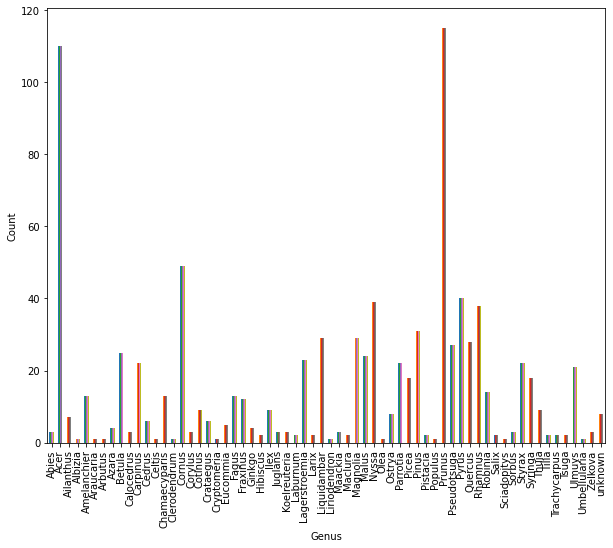

In [6]:
# count the values for each category
count_df = dfSE.groupby('Genus').count()

# create a bar chart with larger figure size
fig, ax = plt.subplots(figsize=(10,8))
count_df.plot(kind='bar', legend=None, ax = ax)
plt.ylabel('Count')
plt.show()

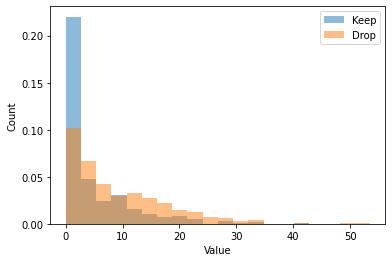

In [7]:
# group the data by category and create a histogram for each group
fig, ax = plt.subplots()
max_value = dfSE["DBH"].max()
dfSE.groupby('Keep')['DBH'].plot(kind='hist', alpha=0.5, ax=ax, bins=20, range=(0,max_value),density=True)
plt.legend(labels=['Keep', 'Drop'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [8]:
dfSW = dfSW.loc[:, ['OBJECTID','DBH','Condition','Scientific','Family','Genus','Common','Functional','Keep','treeID']]
dfSW = dfSW.sort_values(by=['Keep', 'treeID'], ascending=[False, True])
dfSW['treeID'] = dfSW['treeID'] + 10000
dfSW

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
1272,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004
945,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005
1011,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006
1025,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007
1373,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008
...,...,...,...,...,...,...,...,...,...,...
329,115316,23.50,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,0,15537
330,115317,38.60,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,0,15537
2039,139154,4.80,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,0,15539
1085,131985,9.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,0,15542


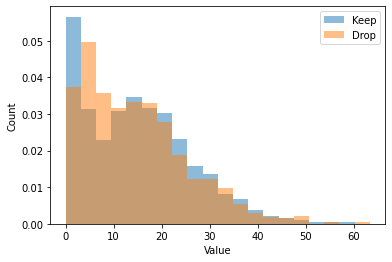

In [9]:
# compare keep and d
fig, ax = plt.subplots()
max_value = dfSW["DBH"].max()
dfSW.groupby('Keep')['DBH'].plot(kind='hist', alpha=0.5, ax=ax, bins=20, range=(0,max_value),density=True)
plt.legend(labels=['Keep', 'Drop'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [10]:
dfSW = dfSW.drop(dfSW[dfSW['Keep'] == 0].index)
dfSE = dfSE.drop(dfSE[dfSE['Keep'] == 0].index)
dfSE

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
133,152520,1.40,Good,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,22446
248,152677,3.50,Poor,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20009
204,152615,2.90,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20010
247,152676,3.60,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20011
271,152712,3.80,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20061
...,...,...,...,...,...,...,...,...,...,...
623,153522,7.40,Fair,Prunus spp.,Rosaceae,Prunus,plum,BD,1,27534
814,153844,2.40,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27603
840,153881,3.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27604
815,153845,2.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27605


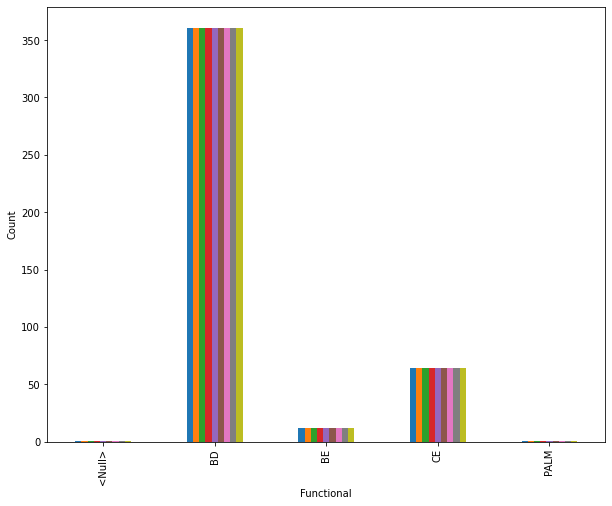

In [11]:
# count the values for each category
count_df = dfSE.groupby('Functional').count()

# create a bar chart with larger figure size
fig, ax = plt.subplots(figsize=(10,8))
count_df.plot(kind='bar', legend=None, ax = ax)
plt.ylabel('Count')
plt.show()

In [12]:
dfPE
dfPE = dfPE.loc[:, ['OBJECTID','DBH','Condition','Genus_spec','Family','Genus','Common_nam','Functional','Keep','treeID']]
dfPW = dfPW.loc[:, ['OBJECTID','DBH','Condition','Genus_spec','Family','Genus','Common_nam','Functional','Keep','treeID']]

In [13]:
dfPE.columns = dfSE.columns.tolist()
dfPW.columns = dfSE.columns.tolist()
dfPE['treeID'] = dfPE['treeID'] + 20000
dfPW['treeID'] = dfPW['treeID'] + 10000
print(dfPW)
print(dfPE)
print(dfSW)
print(dfSE)

     OBJECTID   DBH Condition        Scientific        Family    Genus  \
0       71056 24.90      Fair  Acer platanoides   Sapindaceae     Acer   
1       71057 56.90      Fair     Quercus rubra      Fagaceae  Quercus   
2       71058 43.80      Fair     Quercus rubra      Fagaceae  Quercus   
3       71059 24.50      Fair  Acer platanoides   Sapindaceae     Acer   
4       71457 17.90      Poor  Acer platanoides   Sapindaceae     Acer   
..        ...   ...       ...               ...           ...      ...   
184     95863 15.70      Poor    Pinus contorta      Pinaceae    Pinus   
185     95864 27.00      Fair  Acer platanoides   Sapindaceae     Acer   
186     95869 47.40      Fair  Acer saccharinum   Sapindaceae     Acer   
187     95872  6.90      Fair     Thuja plicata  Cupressaceae    Thuja   
188     95873 38.90      Fair  Catalpa speciosa  Bignoniaceae  Catalpa   

                         Common Functional  Keep  treeID  
0                  Norway maple         BD     0   1

In [14]:
dfPW = dfPW.drop(dfPW[dfPW['Keep'] == 0].index)
dfPE = dfPE.drop(dfPE[dfPE['Keep'] == 0].index)

['BD' 'CE']
Condition
Fair    692
Good    206
Poor     40
dtype: int64
Empty DataFrame
Columns: [OBJECTID, DBH, Condition, Scientific, Family, Genus, Common, Functional, Keep, treeID]
Index: []


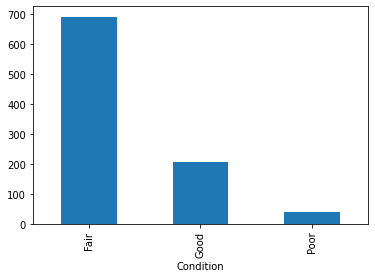

In [15]:
dfW = pd.concat([dfPW, dfSW], axis=0).sort_values(['treeID'])
dfW.loc[1897, 'treeID'] = 14959
dfW.drop(903,inplace=True)
dfW.loc[dfW['Functional'] == '<Null>', 'Functional'] = 'BD'
dfW.loc[dfW['Functional'] == 'BE', 'Functional'] = 'BD'
dfW.loc[dfW['Functional'] == 'PALM', 'Functional'] = 'CE'
dfW.loc[dfW['Functional'] == 'CD', 'Functional'] = 'CE'
dfW.loc[dfW['Condition'] == 'Dead', 'Condition'] = 'Poor'
print(dfW['Functional'].unique())
counts = dfW.groupby('Condition').size().sort_values(ascending=False)
counts.plot(kind= "bar")
print(counts)

# Find rows where column 'B' has non-unique values
duplicates = dfW[dfW.duplicated(subset='treeID', keep=False)]
print(duplicates)

Functional
BD    422
CE     67
dtype: int64
Empty DataFrame
Columns: [OBJECTID, DBH, Condition, Scientific, Family, Genus, Common, Functional, Keep, treeID]
Index: []


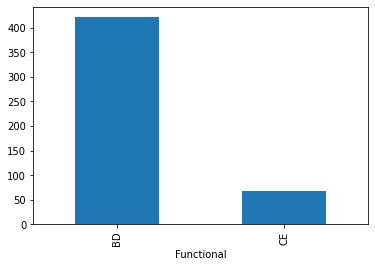

In [16]:
dfE = pd.concat([dfPE, dfSE], axis=0).sort_values(['treeID'])
dfE.loc[dfE['Functional'] == '<Null>', 'Functional'] = 'BD'
dfE.loc[dfE['Functional'] == 'BE', 'Functional'] = 'BD'
dfE.loc[dfE['Functional'] == 'PALM', 'Functional'] = 'CE'
dfE.loc[dfE['Functional'] == 'CD', 'Functional'] = 'CE'
dfE.loc[dfE['Condition'] == 'Dead', 'Condition'] = 'Poor'
counts = dfE.groupby('Functional').size().sort_values(ascending=False)
counts.plot(kind= "bar")
print(counts)

# Find rows where column 'B' has non-unique values
duplicates = dfW[dfW.duplicated(subset='treeID', keep=False)]
print(duplicates)

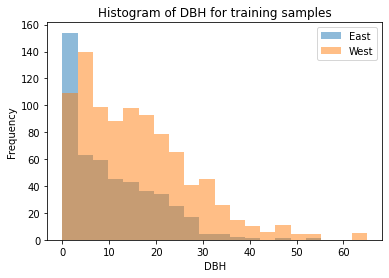

In [17]:
# Draw a histogram of column 'A'
plt.hist(dfE['DBH'], alpha=0.5, label='East', bins=20, range=(0,65),density=False)
plt.hist(dfW['DBH'], alpha=0.5, label='West', bins=20, range=(0,65),density=False)

# Set the chart title and axis labels
plt.title('Histogram of DBH for training samples')
plt.xlabel('DBH')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [18]:
dfW

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
1272,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004
945,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005
1011,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006
1025,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007
1373,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008
...,...,...,...,...,...,...,...,...,...,...
1601,137198,31.20,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,15538
2040,139155,31.10,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,15539
1624,137236,23.30,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,15541
1087,131987,8.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,15544


In [19]:
dfE

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
248,152677,3.50,Poor,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20009
204,152615,2.90,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20010
247,152676,3.60,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20011
271,152712,3.80,Fair,Pyrus spp.,Rosaceae,Pyrus,pear,BD,1,20061
8,151143,1.80,Good,Koelreuteria paniculata,Sapindaceae,Koelreuteria,golden rain tree,BD,1,20097
...,...,...,...,...,...,...,...,...,...,...
623,153522,7.40,Fair,Prunus spp.,Rosaceae,Prunus,plum,BD,1,27534
814,153844,2.40,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27603
840,153881,3.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27604
815,153845,2.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27605


In [20]:
df = pd.concat([dfW, dfE])
df

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID
1272,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004
945,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005
1011,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006
1025,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007
1373,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008
...,...,...,...,...,...,...,...,...,...,...
623,153522,7.40,Fair,Prunus spp.,Rosaceae,Prunus,plum,BD,1,27534
814,153844,2.40,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27603
840,153881,3.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27604
815,153845,2.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27605


Family
Sapindaceae          467
Rosaceae             260
Fagaceae              85
Cornaceae             78
Betulaceae            75
Pinaceae              64
Magnoliaceae          43
Ulmaceae              37
Oleaceae              34
Juglandaceae          32
Altingiaceae          30
Malvaceae             28
Hamamelidaceae        23
Leguminosae           23
Cercidiphyllaceae     21
Platanaceae           17
Cupressaceae          16
Ginkgoaceae           12
Rhamnaceae            12
Anacardiaceae         10
Styracaceae            9
Verbenaceae            7
Lythraceae             6
Aquifoliaceae          5
Fabaceae               5
Salicaceae             5
Theaceae               4
Bignoniaceae           4
Simaroubaceae          3
Arecaceae              3
unknown                2
Sciadopityaceae        1
Myrtoideae             1
Styraceae              1
Taxodiaceae            1
Lauraceae              1
Ericaceae              1
Nyssaceae              1
dtype: int64
Empty DataFrame
Columns: [OBJE

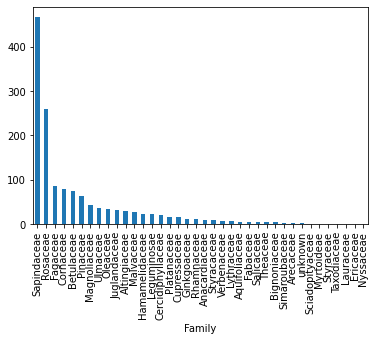

In [21]:
counts = df.groupby('Family').size().sort_values(ascending=False)
counts.plot(kind= "bar")
print(counts)

# Find rows where column 'B' has non-unique values
duplicates = df[df.duplicated(subset='treeID', keep=False)]
print(duplicates)

Functional
BD    1342
CE      85
dtype: int64


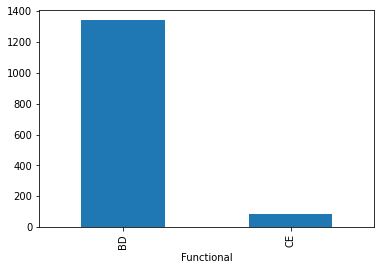

In [22]:
dfE_independent = pd.merge(dfE, popu, on='treeID')
dfW_independent = pd.merge(dfW, popu, on='treeID')
df_independent = pd.merge(df, popu, on='treeID')
dfW_independent
# check for missing values in the 'income' column
# if df_independent['dns_gap'].isna().any():
#     print('There are missing values in the column.')
# else:
#     print('There are no missing values in the column.')
df_independent
counts = df.groupby('Functional').size().sort_values(ascending=False)
counts.plot(kind= "bar")
print(counts)

1427
Condition
Fair    1002
Good     359
Poor      66
dtype: int64


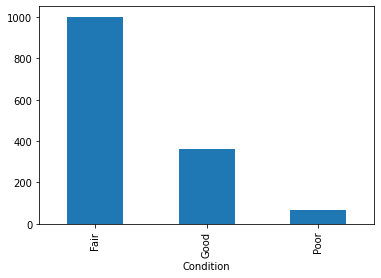

In [23]:
df_independent
counts = df.groupby('Condition').size().sort_values(ascending=False)
counts.plot(kind= "bar")
print(len(df_independent))
print(counts)

In [24]:
df.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeTraining_Clean.csv', index=False)
dfW.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West_TreeTraining_Clean.csv', index=False)
dfE.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East_TreeTraining_Clean.csv', index=False)

In [25]:
df_independent.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeMerge_Clean.csv', index=False)
dfW_independent.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West_TreeMerge_Clean.csv', index=False)
dfE_independent.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East_TreeMerge_Clean.csv', index=False)